In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Plot options

In [4]:
sns.set_style("whitegrid")

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# 1. How to measure the goodness of forecasting?

1) Mean error: Quantify the bias (both under and over, since it also considers the sign)
$$ ME = \frac{\sum (D_t - F_t)}{n}$$

2) Mean absolute percent error: 
$$ MAPE = \frac{\sum \left| D_t - \frac{F_t}{D_t} \right|}{n}$$

3) Mean squared error: (Higher weight to large errors)
$$ MSE = \frac{\sum (D_t - F_t)^2}{n}$$

Let's calculate it, using the dataset:

In [8]:
demand = pd.read_csv("Forecast-Example-Data.csv")
# Reverse rows in pandas: [::-1]
naive_forecast = (demand[::-1].append(pd.Series(), ignore_index=True))[::-1].reset_index(drop = True)

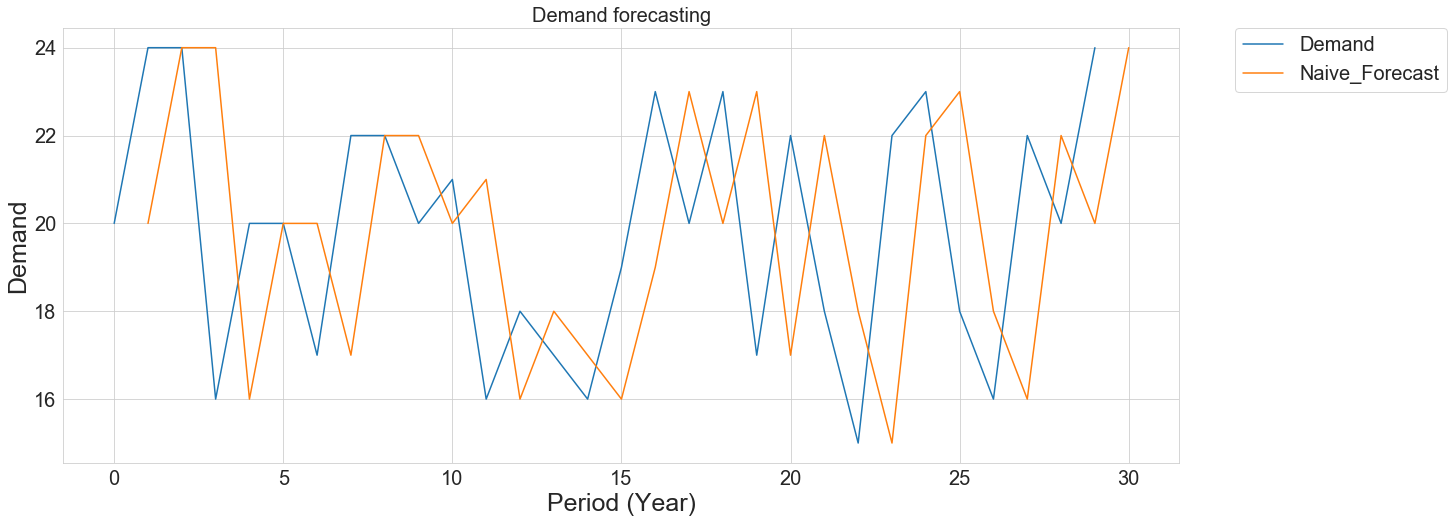

In [9]:
plt.figure(figsize=(20, 8))
demand_plot = plt.plot(demand, label = 'Demand')
forecast_plot = plt.plot(naive_forecast, label = 'Naive_Forecast')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Period (Year)")
plt.ylabel("Demand")
plt.title("Demand forecasting")
plt.show()

Now, we estimate errors:

In [64]:
ME = np.mean(demand[2:].reset_index(drop = True) - naive_forecast[2:-1].reset_index(drop = True)[:-1])
print("ME = ", ME)

ME =  Demand   -0.148148
dtype: float64


In [65]:
MAPE = np.mean(np.abs(demand[2:].reset_index(drop = True) - (naive_forecast[2:-1].reset_index(drop = True)/demand[1:].reset_index(drop = True))))
print("MAPE = ", MAPE)

MAPE =  Demand    18.678571
dtype: float64


In [67]:
MSE = (np.linalg.norm(demand[2:].reset_index(drop = True) - naive_forecast[2:-1].reset_index(drop = True), 2)**2)/naive_forecast[1:].shape[0]
print("MSE = ", MSE)

MSE =  13.799999999999999


# 2. Moving average

Simply do:
$$F_t = \frac{1}{N} \sum_{i = t - N}^{t-1} D_i$$

Q) What N to use?

A) Use different N and check which N returns suitable forecast.

Let's do the job:

In [248]:
Max_N = 7
MSE_MA_Forecast = []
for N in range(Max_N):
    if N >= 3:
        MA_Val = demand.rolling(N, min_periods=N).mean().round(0)
        MA_Val.index += 1
        MSE_MA_Forecast.append((np.linalg.norm(demand[N:] - MA_Val[N-1:-1], 2)**2)/demand[N:].shape[0])

In [249]:
MSE_MA_Forecast

[11.074074074074074, 9.038461538461538, 9.120000000000003, 9.16666666666667]

Seems like $N = 4$ is the best choice...

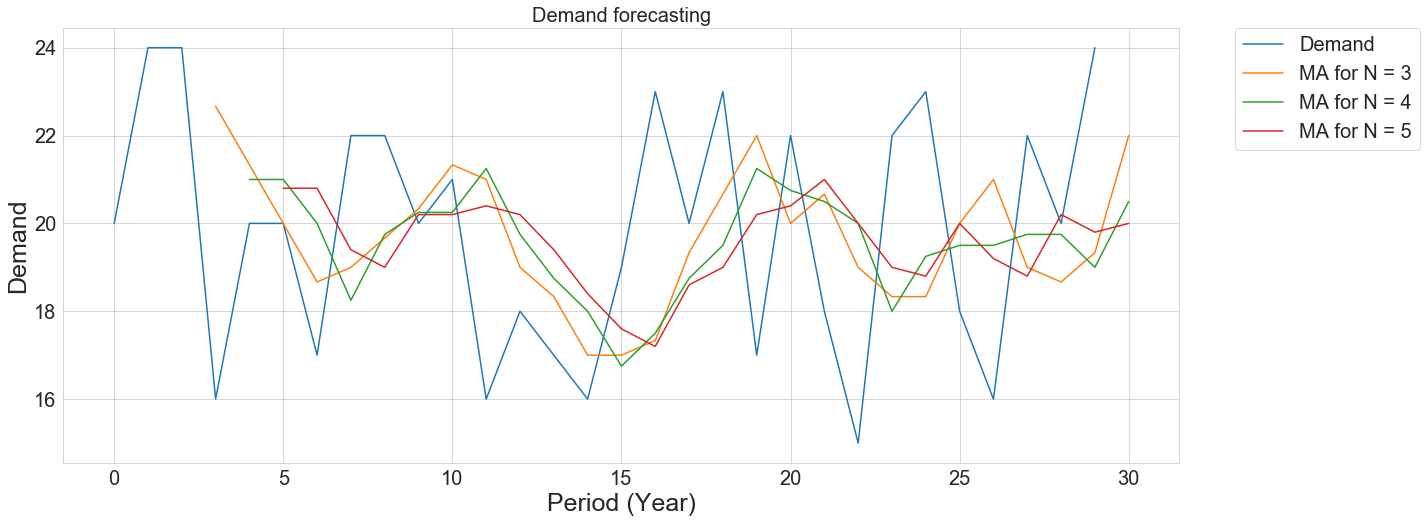

In [263]:
plt.figure(figsize=(20, 8))
demand_plot = plt.plot(demand, label = 'Demand')

N = 3
MA_Val = demand.rolling(N, min_periods=N).mean()[N-1:]
MA_Val.index += 1
forecast_plot = plt.plot(MA_Val, label = 'MA for N = 3')

N = 4
MA_Val = demand.rolling(N, min_periods=N).mean()[N-1:]
MA_Val.index += 1
forecast_plot = plt.plot(MA_Val, label = 'MA for N = 4')

N = 5
MA_Val = demand.rolling(N, min_periods=N).mean()[N-1:]
MA_Val.index += 1
forecast_plot = plt.plot(MA_Val, label = 'MA for N = 5')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Period (Year)")
plt.ylabel("Demand")
plt.title("Demand forecasting")
plt.show()

Clearly big N implies less sensitivity.